In [58]:
import tensorflow_datasets as tfds


In [59]:
data=tfds.load(name="imdb_reviews",split=["train","test"],as_supervised=True);


In [60]:
train_data,test_data=data

In [61]:
msg=f"""{len(train_data)} {len(test_data)} """
msg

'25000 25000 '

In [62]:
data=tfds.load(name="imdb_reviews",split=["train[:60%]","train[60%:]","test"],as_supervised=True);


In [63]:
train_data,valid_data,test_data=data

In [64]:
msg=f"""
 train_data: {len(train_data)} 
 valid_data: {len(valid_data)} 
 test_data :  {len(test_data)} 
"""
msg

'\n train_data: 15000 \n valid_data: 10000 \n test_data :  25000 \n'

In [65]:
x=train_data.batch(100)
len(x)

150

In [66]:
x_inputs,x_lables=next(iter(x))
x_lables

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])>

In [67]:
for i in x_inputs[:3]:
    print(i)
    print("*"*40)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
****************************************
tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However

In [68]:
import tensorflow_hub as hub
import tensorflow as tf

In [69]:
url="https://tfhub.dev/google/nnlm-de-dim128/2"

In [70]:
hube=hub.KerasLayer(url,input_shape=[],trainable=True,dtype=tf.string)

In [71]:
model=tf.keras.Sequential()
model.add(hube)
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 128)               125307520 
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 125,309,601
Trainable params: 125,309,601
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
            metrics=["accuracy"])

In [73]:
history=model.fit(
        train_data.shuffle(10000).batch(512),
        epochs=20,
        validation_data=valid_data.batch(512),
        verbose=1)

Epoch 1/20
30/30 [==============================] - 84s 3s/step - loss: 0.6469 - accuracy: 0.6698 - val_loss: 0.5782 - val_accuracy: 0.7640
Epoch 2/20
30/30 [==============================] - 79s 3s/step - loss: 0.4908 - accuracy: 0.8166 - val_loss: 0.4384 - val_accuracy: 0.8302
Epoch 3/20
30/30 [==============================] - 79s 3s/step - loss: 0.3416 - accuracy: 0.8801 - val_loss: 0.3569 - val_accuracy: 0.8517
Epoch 4/20
30/30 [==============================] - 79s 3s/step - loss: 0.2469 - accuracy: 0.9147 - val_loss: 0.3262 - val_accuracy: 0.8618
Epoch 5/20
30/30 [==============================] - 79s 3s/step - loss: 0.1843 - accuracy: 0.9394 - val_loss: 0.3191 - val_accuracy: 0.8650
Epoch 6/20
30/30 [==============================] - 79s 3s/step - loss: 0.1360 - accuracy: 0.9599 - val_loss: 0.3233 - val_accuracy: 0.8660
Epoch 7/20
30/30 [==============================] - 88s 3s/step - loss: 0.1003 - accuracy: 0.9758 - val_loss: 0.3373 - val_accuracy: 0.8619
Epoch 8/20
30/30 [==

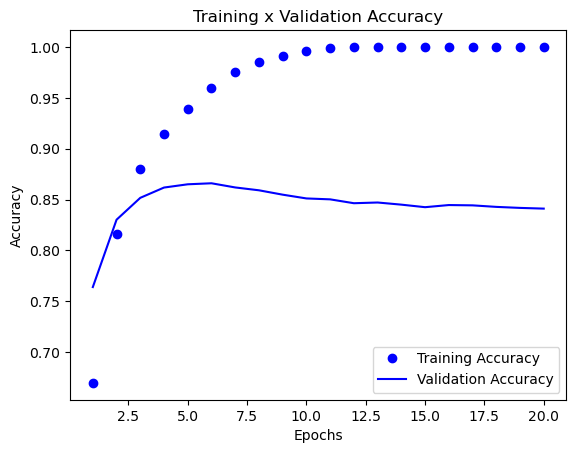

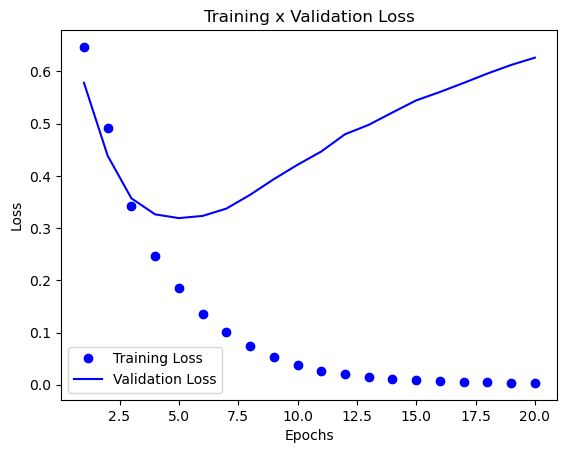

In [74]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training x Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training x Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [75]:
results = model.evaluate(train_data.batch(512), verbose=0)
for name , value in zip(model.metrics_names,results):
    print("%s: %.5f"%(name,value))

loss: 0.00306
accuracy: 1.00000
